A simple image classification pipeline would consist of the following steps:
1. Load an image.
2. Resize it to a predefined size such as 224 x 224 pixels.
3. Scale the values of the pixel to the range [0,1] or [–1,1], aka normalization.
4. Select a pretrained model.
5. Run the pretrained model on the image to get a list of category predictions and
their respective probabilities.
6. Display a few of the highest probability categories.

Keras works with batches of images. So, the first dimension is used for the number of samples (or images) you have.

When you load a single image, you get the shape of one image, which is (size1,size2,channels).

In order to create a batch of images, you need an additional dimension: (samples, size1,size2,channels)

The **preprocess_input** function is meant to adequate your image to the format the model requires.

**Description:** 

These map the class integers to the actual class names in the pre-defined models.

**Usage** 

decode_predictions(pred, model = c("Xception", "VGG16", "VGG19", "ResNet50",
  "InceptionV3"), top = 5)

**Arguments** 

pred: The output of predictions from the specified model

model: The model you wish to preprocess to

top: Integer, how many top-guesses to return.

In [1]:
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

from tensorflow.keras.preprocessing import image
#Set of tools for real-time data augmentation on image data.

import numpy as np
import matplotlib.pyplot as plt

In [2]:
IMG_PATH = 'cat.jpg'

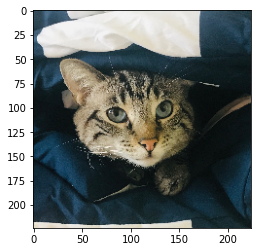

In [3]:
img = image.load_img(IMG_PATH, target_size=(224,224))
plt.imshow(img)

In [4]:
model = tf.keras.applications.resnet50.ResNet50()

102973440/102967424 [==============================] - 1s 0us/step


Our model has previously been trained only to accept a batch of images. expand_dims adds an extra dimension to the array, thereby creating an array of arrays (or a batch of one image).

consider this scenario: for a batch of 64 images of size 224 x 224
pixels, each containing three channels (RGB), the object representing that batch
would have a shape 64 x 224 x 224 x 3. In the code that follows, where we’d be using
only one 224 x 224 x 3 image, we’d create a batch of just that image by expanding the
dimensions from three to four. The shape of this newly created batch would be 1 x
224 x 224 x 3:

Given that image pixel values
are between 0 and 255, running the preprocess_input function from Keras on input
images will normalize each pixel to a standard range. Normalization or feature scaling
is one of the core steps in preprocessing images to make them suitable for deep learning.

In [5]:
def predict(img_path):
  img = image.load_img(img_path,target_size=(224,224))
  img_array = image.img_to_array(img)
  img_batch = np.expand_dims(img_array,axis=0)
  img_preprocessed = preprocess_input(img_batch)
  model = tf.keras.applications.resnet50.ResNet50()
  prediction = model.predict(img_preprocessed)
  print(decode_predictions(prediction,top=3)[0])


In [6]:
predict(IMG_PATH)

40960/35363 [==================================] - 0s 0us/step
[('n02123045', 'tabby', 0.5681725), ('n02124075', 'Egyptian_cat', 0.22223192), ('n02123159', 'tiger_cat', 0.061033927)]


The predicted categories for this image are various types of felines. Why doesn’t it
simply predict the word “cat,” instead? The short answer is that the ResNet-50 model
was trained on a granular dataset with many categories and does not include the
more general “cat.”

In [7]:
IMG_PATH = 'Dog.jpg'

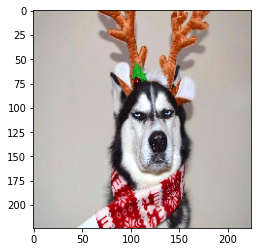

In [8]:
img2 = image.load_img(IMG_PATH,target_size=(224,224))
plt.imshow(img2)

In [9]:
predict(IMG_PATH)

[('n02110185', 'Siberian_husky', 0.4929318), ('n02109961', 'Eskimo_dog', 0.45522875), ('n02110063', 'malamute', 0.025612932)]
